In [2]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score 
import matplotlib.pyplot as plt
import array as arr
%matplotlib inline

In [4]:
iris=pd.read_csv("Iris.csv")
iris.sample(10)

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
80,5.5,2.4,3.8,1.1,Iris-versicolor
71,6.1,2.8,4.0,1.3,Iris-versicolor
40,5.0,3.5,1.3,0.3,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa
147,6.5,3.0,5.2,2.0,Iris-virginica
7,5.0,3.4,1.5,0.2,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
36,5.5,3.5,1.3,0.2,Iris-setosa
81,5.5,2.4,3.7,1.0,Iris-versicolor
123,6.3,2.7,4.9,1.8,Iris-virginica


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [5]:
iris.isnull().sum()

Sepal Length (in cm)    0
Sepal Width in (cm)     0
Petal length (in cm)    0
Petal width (in cm)     0
Class                   0
dtype: int64

## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [6]:
iris.Class

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
6         Iris-setosa
7         Iris-setosa
8         Iris-setosa
9         Iris-setosa
10        Iris-setosa
11        Iris-setosa
12        Iris-setosa
13        Iris-setosa
14        Iris-setosa
15        Iris-setosa
16        Iris-setosa
17        Iris-setosa
18        Iris-setosa
19        Iris-setosa
20        Iris-setosa
21        Iris-setosa
22        Iris-setosa
23        Iris-setosa
24        Iris-setosa
25        Iris-setosa
26        Iris-setosa
27        Iris-setosa
28        Iris-setosa
29        Iris-setosa
            ...      
120    Iris-virginica
121    Iris-virginica
122    Iris-virginica
123    Iris-virginica
124    Iris-virginica
125    Iris-virginica
126    Iris-virginica
127    Iris-virginica
128    Iris-virginica
129    Iris-virginica
130    Iris-virginica
131    Iris-virginica
132    Iris-virginica
133    Iris-virginica
134    Iri

In [7]:
class2 = {'Iris-setosa': 1,'Iris-virginica': 2, 'Iris-versicolor':3}

In [8]:
iris.Class = [class2[item] for item in iris.Class] 
print(iris)

     Sepal Length (in cm)  Sepal Width in (cm)  Petal length (in cm)  \
0                     5.1                  3.5                   1.4   
1                     4.9                  3.0                   1.4   
2                     4.7                  3.2                   1.3   
3                     4.6                  3.1                   1.5   
4                     5.0                  3.6                   1.4   
5                     5.4                  3.9                   1.7   
6                     4.6                  3.4                   1.4   
7                     5.0                  3.4                   1.5   
8                     4.4                  2.9                   1.4   
9                     4.9                  3.1                   1.5   
10                    5.4                  3.7                   1.5   
11                    4.8                  3.4                   1.6   
12                    4.8                  3.0                  

## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [9]:
corr = iris.corr()

In [10]:
corr #since no corelation is between the given range so not dropping any column.

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
Sepal Length (in cm),1.000000,-0.109369,0.871754,0.817954,0.460039
Sepal Width in (cm),-0.109369,1.000000,-0.420516,-0.356544,-0.612165
Petal length (in cm),0.871754,-0.420516,1.000000,0.962757,0.649101
Petal width (in cm),0.817954,-0.356544,0.962757,1.000000,0.580749
Class,0.460039,-0.612165,0.649101,0.580749,1.000000


## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [11]:
iris.var()
#No variable is less than 0.1.

Sepal Length (in cm)    0.685694
Sepal Width in (cm)     0.188004
Petal length (in cm)    3.113179
Petal width (in cm)     0.582414
Class                   0.671141
dtype: float64

## Question 6

*Plot the scatter matrix for all the variables.*

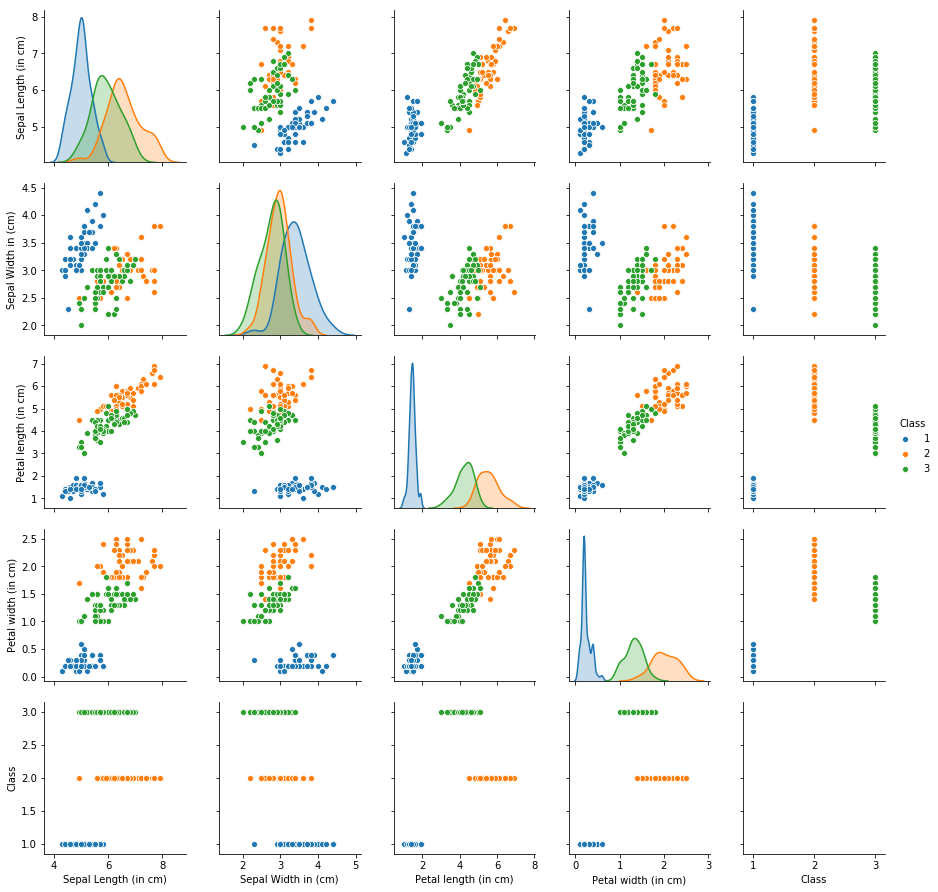

In [32]:
sns.pairplot(iris, hue="Class")

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [18]:
X=iris.iloc[ : ,0:4]
Y=iris['Class']

In [25]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [26]:
model = KNeighborsClassifier(n_neighbors = 3)

In [27]:
X_train.shape

(120, 4)

In [29]:
model=model.fit(X_train, Y_train)

In [30]:
y_pred = model.predict(X_test)

In [31]:
accuracy_score(Y_test, y_pred)

1.0

In [34]:
model = KNeighborsClassifier(n_neighbors = 5)
X_train.shape
model=model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
accuracy_score(Y_test, y_pred)

1.0

In [36]:
model = KNeighborsClassifier(n_neighbors = 9)
X_train.shape
model=model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
accuracy_score(Y_test, y_pred)

0.9666666666666667

## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [50]:
x=[]
y=[]
for l in range(1,20,2):
    NNH1 = KNeighborsClassifier(n_neighbors=l)
    NNH1.fit(X_train,Y_train)
    y_pred=NNH1.predict(X_test)
    acc1=accuracy_score(Y_test,y_pred)
    mse=1-acc1
    print(l,mse)
    x.append(l)
    y.append(acc1)
#on 1 3 5 mse is lowest

1 0.0
3 0.0
5 0.0
7 0.033333333333333326
9 0.033333333333333326
11 0.033333333333333326
13 0.033333333333333326
15 0.033333333333333326
17 0.033333333333333326
19 0.033333333333333326


## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

In [52]:
x,y

([1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
 [1.0,
  1.0,
  1.0,
  0.9666666666666667,
  0.9666666666666667,
  0.9666666666666667,
  0.9666666666666667,
  0.9666666666666667,
  0.9666666666666667,
  0.9666666666666667])

Text(0, 0.5, 'Accuracy Score')

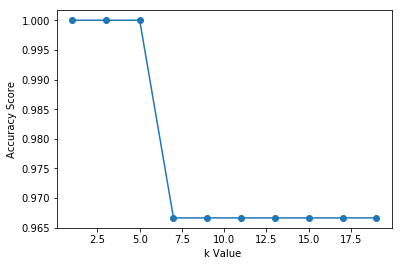

In [53]:
plt.plot(x,y,'-o')
plt.xlabel('k Value ')
plt.ylabel('Accuracy Score')

# Naive Bayes with Iris Data

In [ ]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA


### Slice  Iris data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [60]:
df=pd.read_csv("Iris.csv")

In [61]:
y = df['Class']
X = df.drop(['Class'], axis = 1)

In [62]:
#Check the dataset
print(y)
print(X)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
6         Iris-setosa
7         Iris-setosa
8         Iris-setosa
9         Iris-setosa
10        Iris-setosa
11        Iris-setosa
12        Iris-setosa
13        Iris-setosa
14        Iris-setosa
15        Iris-setosa
16        Iris-setosa
17        Iris-setosa
18        Iris-setosa
19        Iris-setosa
20        Iris-setosa
21        Iris-setosa
22        Iris-setosa
23        Iris-setosa
24        Iris-setosa
25        Iris-setosa
26        Iris-setosa
27        Iris-setosa
28        Iris-setosa
29        Iris-setosa
            ...      
120    Iris-virginica
121    Iris-virginica
122    Iris-virginica
123    Iris-virginica
124    Iris-virginica
125    Iris-virginica
126    Iris-virginica
127    Iris-virginica
128    Iris-virginica
129    Iris-virginica
130    Iris-virginica
131    Iris-virginica
132    Iris-virginica
133    Iris-virginica
134    Iri

# Question 11 
Find the distribution of target variable (Class)

And, Plot the distribution of target variable using histogram

In [63]:
y.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Class, dtype: int64

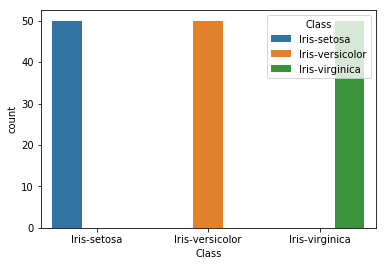

In [64]:
sns.countplot(y,hue=y)

In [65]:
#Drop Id variable from data
#no id variable

### Question 12 
Find Correlation among all variables and give your insights 

In [66]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here

In [68]:
df.corr()
##as Class in non numeric it is not there in correctlation so it will be encoded as 0,1,2

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
Sepal Length (in cm),1.000000,-0.109369,0.871754,0.817954
Sepal Width in (cm),-0.109369,1.000000,-0.420516,-0.356544
Petal length (in cm),0.871754,-0.420516,1.000000,0.962757
Petal width (in cm),0.817954,-0.356544,0.962757,1.000000


In [69]:
class3 = {'Iris-setosa': 1,'Iris-virginica': 2, 'Iris-versicolor':3}

In [70]:
df.Class = [class3[item] for item in df.Class] 
print(df)

     Sepal Length (in cm)  Sepal Width in (cm)  Petal length (in cm)  \
0                     5.1                  3.5                   1.4   
1                     4.9                  3.0                   1.4   
2                     4.7                  3.2                   1.3   
3                     4.6                  3.1                   1.5   
4                     5.0                  3.6                   1.4   
5                     5.4                  3.9                   1.7   
6                     4.6                  3.4                   1.4   
7                     5.0                  3.4                   1.5   
8                     4.4                  2.9                   1.4   
9                     4.9                  3.1                   1.5   
10                    5.4                  3.7                   1.5   
11                    4.8                  3.4                   1.6   
12                    4.8                  3.0                  

### Split data in Training and test set in 80:20.

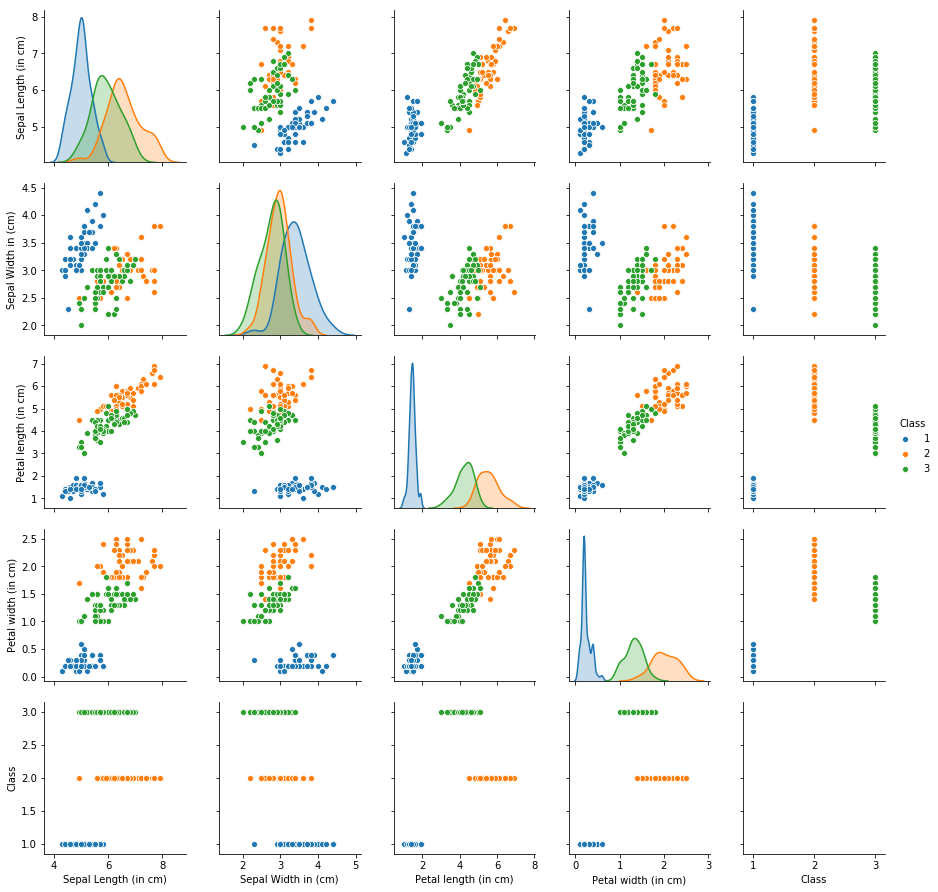

In [71]:
sns.pairplot(df, hue="Class")

In [83]:
X1=df.iloc[ : ,0:4]
y1=df.iloc[ : , 4]
X_train,X_test,Y_train,Y_test=train_test_split(X1,y1,test_size=0.20,random_state=10)

### Question 13 
Do Feature Scaling 

In [84]:
# Use StandardScaler or similar methods
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 

In [85]:
x1_train=scaler.fit_transform(X_train)
x2_test=scaler.fit_transform(X_test)

### Question 14 
Train and Fit NaiveBayes Model

In [86]:
#Fit the model
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB()
GNB1 =GNB.fit(x1_train, Y_train)

In [87]:
#Predict
y_pred=GNB.predict(x2_test)

In [88]:
y_pred

array([3, 2, 1, 3, 1, 3, 2, 3, 1, 3, 3, 2, 3, 1, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 1, 3, 1, 3, 3, 2, 2])

### Question 15 
Print Accuracy and Confusion Matrix and Conclude your findings

In [89]:
# show Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test,y_pred)
print(confusion_matrix)

[[10  0  0]
 [ 0  7  0]
 [ 0  3 10]]


In [90]:
# show accuracy
accuracy_score(Y_test,y_pred)

0.9

In [91]:
#Show precision and Recall metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [92]:
precision_score(Y_test,y_pred,average='weighted')

0.9299999999999999

In [93]:
recall_score(Y_test,y_pred,average='weighted')

0.9